In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import cufflinks as cf
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Importing cleaned up data-set

After the process of data munging and exploratory data analysis, I was able to create a cleaned up data set

In [110]:
df = pd.read_csv('../data/train_clean.csv')

In [111]:
df.columns

Index(['Unnamed: 0', 'bedrooms_total', 'baths_total', 'acres', 'sq_ft_tot_fn',
       'tax_gross_amount', 'assessment_value_town', 'garage_capacity',
       'year_built', 'total_stories', 'rooms_total', 'garage', 'flood_zone',
       'basement', 'price_closed', 'city__Pomfret', 'city__Woodstock',
       'covenants__Unknown', 'covenants__Yes', 'garage_type', 'short_sale',
       'basement_access_type', 'current_use'],
      dtype='object')

In [112]:
df = df.drop('Unnamed: 0',axis=1)

In [113]:
df.head()

bedrooms_total  baths_total  acres  sq_ft_tot_fn  tax_gross_amount  \
0             3.0          3.0   1.58        3740.0           11044.0   
1             4.0          3.0   5.19        2276.0           13438.0   
2             4.0          3.0   0.84        2200.0            6361.0   
3             3.0          3.0  15.40        2926.0           11829.0   
4             4.0          5.0   4.00        2817.0           10707.0   

   assessment_value_town  garage_capacity  year_built  total_stories  \
0               538200.0              2.0      1970.0            2.0   
1               696500.0              2.0      1990.0            2.0   
2               329700.0              1.0      1800.0            2.0   
3               697600.0              2.0      1995.0            2.0   
4               512100.0              2.0      1968.0            1.5   

   rooms_total     ...       basement  price_closed  city__Pomfret  \
0         14.0     ...            1.0      495000.0            0.0   
1          9.0     ...            0.0      540000.0            0.0   
2         10.0     ...            1.0      460000.0            0.0   
3          7.0     ...            1.0      500000.0            1.0   
4          6.0     ...            1.0      605914.0            0.0   

   city__Woodstock  covenants__Unknown  covenants__Yes  garage_type  \
0              1.0                 1.0             0.0          2.0   
1              1.0                 0.0             0.0          1.0   
2              1.0                 0.0             0.0          3.0   
3              0.0                 0.0             1.0          0.0   
4              1.0                 0.0             1.0          1.0   

   short_sale  basement_access_type  current_use  
0         0.0                   0.0     0.000000  
1         1.0                   1.0     0.053388  
2         1.0                   0.0     0.000000  
3         1.0                   0.0     0.000000  
4         0.0                   0.0     0.045406  

[5 rows x 22 columns]

In [11]:
df.iloc[0]

bedrooms_total                3.00
baths_total                   3.00
acres                         1.58
sq_ft_tot_fn               3740.00
tax_gross_amount          11044.00
assessment_value_town    538200.00
garage_capacity               2.00
year_built                 1970.00
total_stories                 2.00
rooms_total                  14.00
garage                        1.00
flood_zone                    0.00
basement                      1.00
price_closed             495000.00
city__Pomfret                 0.00
city__Woodstock               1.00
covenants__Unknown            1.00
covenants__Yes                0.00
garage_type                   2.00
short_sale                    0.00
basement_access_type          0.00
current_use                   0.00
Name: 0, dtype: float64

## Further Data Analysis

In [13]:
df.iplot(kind='scatter',x='year_built', y='price_closed', mode='markers', xTitle='Year',yTitle='Price Closed')

Thus, we can see that Year is potentially a useful feature for our prediction. However, since its range is different than the rest, we might need to scale the dataframe

In [17]:
df[['assessment_value_town','price_closed']].iplot(kind='spread',title='Assessment Value By Town')

An assessment is the value placed on a property by the town or city's assessor's office for the purpose of determining the property tax due. Some of the assessment values follow closely the price closed

In [39]:
df.iplot(kind='scatter',x='sq_ft_tot_fn',y='price_closed',colorscale='set2',mode='markers',symbol='x',xTitle='Square Feet Total',yTitle='Price Closed')

In [68]:
fig = ff.create_distplot([list(df['tax_gross_amount'])],group_labels=['Tax Gross Amount'],bin_size=1000,show_rug=False,colors='set2')
fig.iplot()

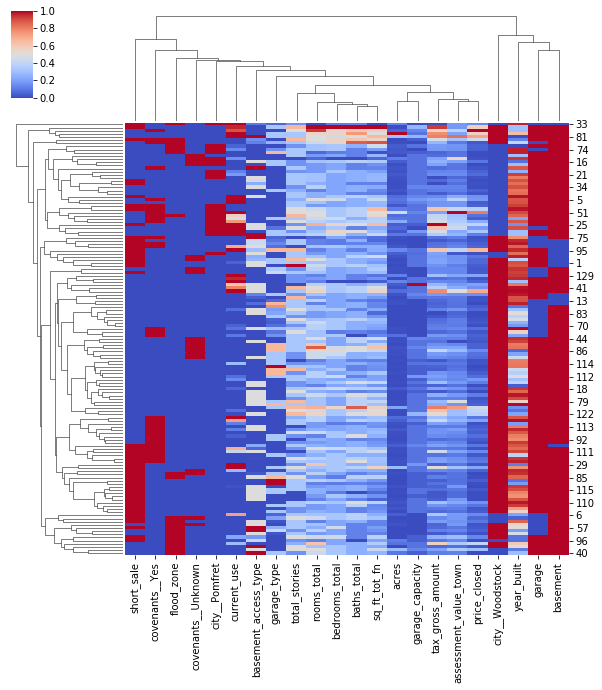

In [69]:
sns.clustermap(df,cmap='coolwarm',standard_scale=1)

In [114]:
target = df['price_closed']

In [115]:
df.drop('price_closed', axis=1,inplace=True)

In [116]:
df = pd.concat([df,target],axis=1)

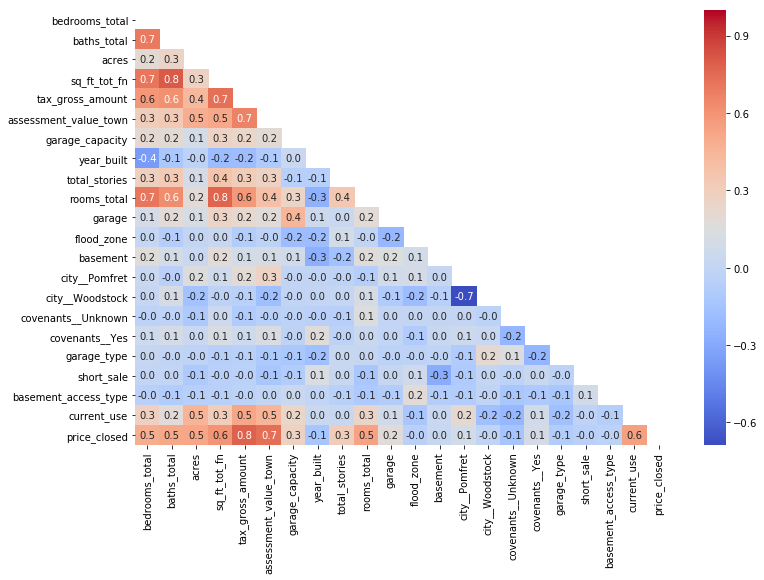

In [118]:
correlation = df.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12,8))
sns.heatmap(correlation,mask=mask,fmt='.1f', annot=True,cmap='coolwarm') 

# Data Preprocessing

In [80]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_features = scaler.fit_transform(df.drop('price_closed',axis=1))

In [88]:
columns = [x for x in df.columns if x !='price_closed']

In [89]:
columns

['bedrooms_total',
 'baths_total',
 'acres',
 'sq_ft_tot_fn',
 'tax_gross_amount',
 'assessment_value_town',
 'garage_capacity',
 'year_built',
 'total_stories',
 'rooms_total',
 'garage',
 'flood_zone',
 'basement',
 'city__Pomfret',
 'city__Woodstock',
 'covenants__Unknown',
 'covenants__Yes',
 'garage_type',
 'short_sale',
 'basement_access_type',
 'current_use']

In [91]:
df_features = pd.DataFrame(scaled_features, columns = [x for x in df.columns if x !='price_closed'])
df_features.describe()

bedrooms_total   baths_total         acres  sq_ft_tot_fn  \
count    1.370000e+02  1.370000e+02  1.370000e+02  1.370000e+02   
mean    -7.009802e-17  1.653179e-16 -3.727756e-17 -1.734217e-16   
std      1.003670e+00  1.003670e+00  1.003670e+00  1.003670e+00   
min     -2.323442e+00 -1.689135e+00 -4.070189e-01 -1.694819e+00   
25%     -5.501186e-01 -9.304089e-01 -3.887400e-01 -6.902584e-01   
50%     -5.501186e-01 -1.716826e-01 -3.147859e-01 -1.374024e-01   
75%      3.365431e-01  5.870437e-01 -7.129070e-02  4.671874e-01   
max      5.656514e+00  4.380675e+00  9.034288e+00  4.327914e+00   

       tax_gross_amount  assessment_value_town  garage_capacity    year_built  \
count      1.370000e+02           1.370000e+02     1.370000e+02  1.370000e+02   
mean       1.831463e-16          -2.123200e-16     1.557959e-16  9.440948e-16   
std        1.003670e+00           1.003670e+00     1.003670e+00  1.003670e+00   
min       -1.066873e+00          -1.311725e+00    -8.475875e-01 -1.992564e+00   
25%       -6.799077e-01          -6.044079e-01    -3.732176e-01 -1.049876e+00   
50%       -3.072027e-01          -3.156055e-01     1.011524e-01  5.301228e-01   
75%        1.718513e-01           1.865450e-01     1.011524e-01  8.620553e-01   
max        3.919567e+00           5.691761e+00     9.588552e+00  1.074492e+00   

       total_stories   rooms_total      ...         flood_zone      basement  \
count   1.370000e+02  1.370000e+02      ...       1.370000e+02  1.370000e+02   
mean    4.862291e-17  2.188031e-16      ...      -4.376062e-17 -6.402016e-17   
std     1.003670e+00  1.003670e+00      ...       1.003670e+00  1.003670e+00   
min    -1.780947e+00 -1.972280e+00      ...      -4.254815e-01 -2.851900e+00   
25%    -8.425250e-01 -8.401471e-01      ...      -4.254815e-01  3.506434e-01   
50%     9.589716e-02 -8.539200e-02      ...      -4.254815e-01  3.506434e-01   
75%     9.589716e-02  6.693631e-01      ...      -4.254815e-01  3.506434e-01   
max     3.849586e+00  4.065761e+00      ...       2.350279e+00  3.506434e-01   

       city__Pomfret  city__Woodstock  covenants__Unknown  covenants__Yes  \
count     137.000000     1.370000e+02        1.370000e+02    1.370000e+02   
mean        0.000000    -8.752123e-17       -1.199365e-16   -2.431145e-17   
std         1.003670     1.003670e+00        1.003670e+00    1.003670e+00   
min        -0.425481    -1.614083e+00       -4.012692e-01   -5.520524e-01   
25%        -0.425481    -1.614083e+00       -4.012692e-01   -5.520524e-01   
50%        -0.425481     6.195469e-01       -4.012692e-01   -5.520524e-01   
75%        -0.425481     6.195469e-01       -4.012692e-01   -5.520524e-01   
max         2.350279     6.195469e-01        2.492093e+00    1.811422e+00   

        garage_type    short_sale  basement_access_type   current_use  
count  1.370000e+02  1.370000e+02          1.370000e+02  1.370000e+02  
mean   1.029185e-16 -7.293436e-17          7.698627e-17  5.834749e-17  
std    1.003670e+00  1.003670e+00          1.003670e+00  1.003670e+00  
min   -7.363811e-01 -7.343881e-01         -7.847720e-01 -5.922698e-01  
25%   -7.363811e-01 -7.343881e-01         -7.847720e-01 -5.922698e-01  
50%   -6.705057e-01 -7.343881e-01         -7.847720e-01 -5.922698e-01  
75%    6.408015e-01  1.361678e+00          9.238186e-01  2.562362e-04  
max    3.395167e+00  1.361678e+00          2.632409e+00  2.097604e+00  

[8 rows x 21 columns]

We can see that the standard deviation is the same, thus our scaler has worked